In [41]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# 修改默认字体
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal'}
plt.rc('font', **font)
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [42]:
# 定义全局变量
miu = 0.01 
g = 9.8
m_ren=70
m_che=7
m = m_ren + m_che
r = 0.66   # 车轮半径
c = 0.25   # 一个未知系数
w_shoulder = 0.46    # 肩宽
l_leg = 1.0        # 腿长
s = w_shoulder * l_leg   # 人加车正对面积
rou = 1.205   # kg/m^3

sigma1 = 42 # 表示有氧呼吸的速率  # sigma2表示无氧呼吸的速率，以函数形式给出

W_max = 2403.5e3  # 最大的功率
alpha = 0.1   # 一个比率

In [47]:
# 阻力函数
f1 = miu*m*g/(2*r)

def f2(v):
    return 1/2*c*rou*s*v*v

def f_zu(v):
    return f1 + f2(v)

def sigma2(P):       # P是人体功率， v是当前速度
    if P < sigma1:
        return 0
    else:
        return P - sigma1 

# P功率最大维持时间
def T(P):
    return W_max / ( (2.38969595e-06*(P-sigma1)**3+3.2) *P)

# 添加k的时间
def T_new(P,k):
    return W_max / ( (2.38969595e-06*( (P-sigma1)/(1-k) )**3+3.2) *( (P-sigma1)/(1-k)+sigma1) )

# 要休息的时间
def T_rest(P):
    if P < 188:
        return 600 * 0.5
    else:
        return ((P-139)*(-9.76562500e-04*P + 1.18359375e+00))/97 * T(P) * 0.5


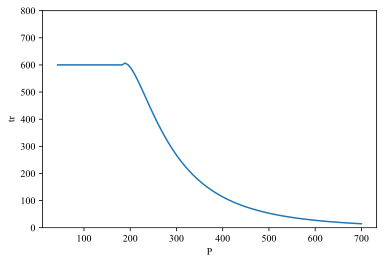

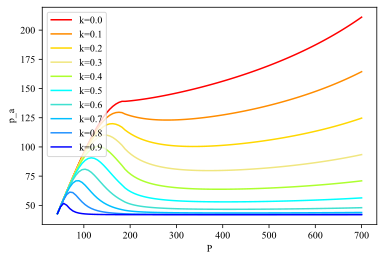

In [48]:
k_test = np.linspace(0,0.9,10)
p_test = np.linspace(43,700,100)

yy=[]
color=["#ff0000","#ff8c00","#ffd700","#f0e680","#adff2f","#00ffff","#40e0d0","#00bfff","#1e90ff","#0000ff","#191970"]
for i in range(len(k_test)):
    t_new = T_new(p_test,k_test[i])
    yy.append(t_new)

# 要休息的时间
tr=((p_test-139)*(-9.76562500e-04*p_test + 1.18359375e+00))/97 * yy[0]
for i in range(100):
    if p_test[i]<188:
        tr[i]=600
plt.plot(p_test,tr)
plt.ylabel("tr")
plt.xlabel("P")
plt.ylim(0,800)
plt.show()

# 平均功率
for i in range(10):
    t=yy[i]
    p_a = (42*tr + p_test * t) / (tr + t)
    plt.plot(p_test,p_a,color=color[i],label="k="+str(format(k_test[i], '.1f')))

plt.ylabel("p_a")
plt.xlabel("P")
plt.legend()
plt.show()             

In [51]:
# 初始化
t=[]
v=[]
p=[]
x=[]
f=[]
k=[]
E=[]
kk=[]
p_new=700
kk.append(0)
sigma=[]
t.append(0)
v.append(0)
p.append(p_new)
x.append(0)
f.append(f1)
k.append(0)
E.append(0)
sigma.append(sigma2(p[0]))
flag=1

ae=0
re=0
T_P = round(T_new(p[0],k[0]))
T_R = round(T_rest(p[0]))
ae = T_P
re = T_P + T_R

# 开始迭代
for i in range(1,10000):
    t_temp = t[i-1]+1;  t.append(t_temp)
    # 确定此时的P
    if i<=ae:
        p_temp = p_new
    elif i>ae and i<re:
        p_temp = sigma1
    elif i==re:
        p_temp = sigma1
        p_new = (700-sigma1)*(1-k[i-1]) + sigma1
        T_P= round(T_new(p_new,k[i-1]))
        T_R= round(T_rest(p_new))
        ae = re + T_P
        re = re + T_P + T_R
    p.append(p_temp)

    v_temp = math.sqrt( 2*(p[i-1]-f[i-1]*v[i-1])/m + v[i-1]**2 ); v.append(v_temp)
    x_temp = x[i-1] + (v[i-1] + v[i])/2;    x.append(x_temp)
    f_temp = f_zu(v[i]);    f.append(f_temp)
    E_temp = E[i-1] + p[i-1] - sigma1;  E.append(E_temp)
    k_temp = (E[i-1] / 2e6); k.append(k_temp//0.1 /10); kk.append(k_temp)

    if(x_temp>140000 and flag):
        print(t_temp)
        flag = 0
    # print('时刻i: ', ' t=',t[i],' p=',p[i],' v=',v[i],' x=',x[i],' f=',f[i],' E=',E[i],' k=',k[i])
    print('时刻i: ', ' t=',t[i],' ae=',ae,' re=',re,' p=',p[i],' v=',v[i],' x=',x[i],' k=',k[i])

时刻i:   t= 1  ae= 5  re= 12  p= 700  v= 4.264014327112209  x= 2.1320071635561044  k= 0.0
时刻i:   t= 2  ae= 5  re= 12  p= 700  v= 5.965816830394519  x= 7.246922742309468  k= 0.0
时刻i:   t= 3  ae= 5  re= 12  p= 700  v= 7.246021776572599  x= 13.852842045793025  k= 0.0
时刻i:   t= 4  ae= 5  re= 12  p= 700  v= 8.302170605954753  x= 21.626938237056702  k= 0.0
时刻i:   t= 5  ae= 5  re= 12  p= 700  v= 9.211149217598518  x= 30.383598148833336  k= 0.0
时刻i:   t= 6  ae= 5  re= 12  p= 42  v= 10.012636283268337  x= 39.99549089926676  k= 0.0
时刻i:   t= 7  ae= 5  re= 12  p= 42  v= 9.902048441564046  x= 49.952833261682954  k= 0.0
时刻i:   t= 8  ae= 5  re= 12  p= 42  v= 9.79407274452053  x= 59.800893854725246  k= 0.0
时刻i:   t= 9  ae= 5  re= 12  p= 42  v= 9.68863923091025  x= 69.54224984244064  k= 0.0
时刻i:   t= 10  ae= 5  re= 12  p= 42  v= 9.585680595643547  x= 79.17940975571754  k= 0.0
时刻i:   t= 11  ae= 5  re= 12  p= 42  v= 9.48513205168951  x= 88.71481607938406  k= 0.0
时刻i:   t= 12  ae= 17  re= 24  p= 42  v= 9.3

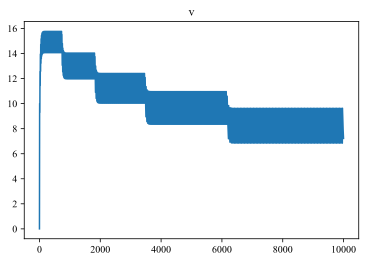

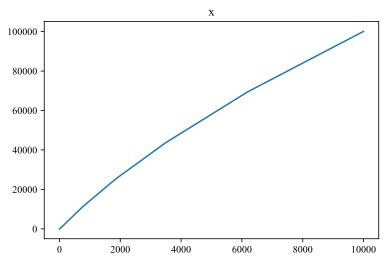

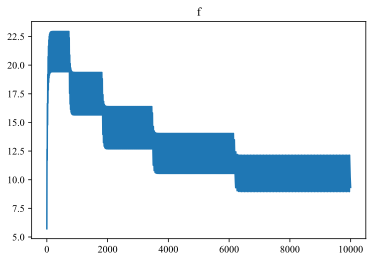

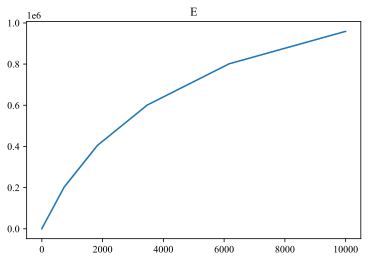

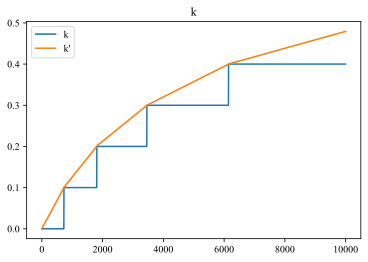

In [52]:
# 绘图

plt.plot(t,v)
plt.title("v")
plt.show()

plt.plot(t,x)
plt.title("x")
plt.show()

plt.plot(t,f)
plt.title("f")
plt.show()

plt.plot(t,E)
plt.title("E")
plt.show()

plt.plot(t,k,label='k')
plt.plot(t,kk,label="k'")

plt.title("k")
plt.legend()
plt.show()
